In [1]:
x=1

In [2]:
import pandas as pd
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('pipeline/data/output/merged_imputation_eval_metrics.tsv', sep='\t')
df

,pearson_mean,spearman_mean,pearson_z_mean,method,setting
0,0.489107,0.398740,0.489107,mean,cite_25
1,0.114310,0.093170,0.114310,mean,multiome_25
2,0.489262,0.398546,0.489262,mean,cite_50
3,0.117013,0.095480,0.117013,mean,multiome_50
4,0.489003,0.397005,0.489003,mean,cite_75
5,0.118649,0.096834,0.118649,mean,multiome_75
6,0.683254,0.584513,0.683254,linear_regression,cite_25
7,0.054137,0.048610,0.054137,linear_regression,multiome_25
8,0.699539,0.601074,0.699539,linear_regression,cite_50
9,0.069687,0.061098,0.069687,linear_regression,multiome_50


In [4]:
methods = ['jamie', 'knn', 'knn_batch', 'linear_regression', 'mean', 'monae', 'scbutterfly', 'scipenn']
settings = ['cite_25', 'cite_50', 'cite_75', 'multiome_25', 'multiome_50', 'multiome_75']

In [5]:
colors = sns.color_palette("Set2")
# to match the order in the plots
palette = {
    "Multigrate": colors[0],
    "Mean": colors[1],
    "Knn": colors[2],
    "Knn batch": colors[3],
    "Linear regression": colors[4],
    "JAMIE": colors[5],
    "Monae": colors[6],
    "scButterfly": colors[7],
    "sciPENN": sns.color_palette("husl", 5)[4],
}

In [6]:
# from accuracy_plots_product_vs_mixture, always product
mtg_results = {
    'cite_25': {
        'pearson_mean': 0.808614,
        'spearman_mean': 0.735175,
        },
    'cite_50': {
        'pearson_mean': 0.802615,
        'spearman_mean': 0.730816,
        },
    'cite_75': {
        'pearson_mean': 0.810253,
        'spearman_mean': 0.737903,
        },
    'multiome_25': {
        'pearson_mean': 0.121545,
        'spearman_mean': 0.098783,
        },
    'multiome_50': {
        'pearson_mean': 0.126002,
        'spearman_mean': 0.102336,
        },
    'multiome_75': {
        'pearson_mean': 0.128349,
        'spearman_mean': 0.103843,
        },
}

In [7]:
dfs = []
for key in mtg_results.keys():
    df_ = pd.DataFrame(mtg_results[key], index=[0])
    df_['setting'] = key
    dfs.append(df_)

df_mtg = pd.concat(dfs)
df_mtg.reset_index(inplace=True, drop=True)
df_mtg['method'] = 'multigrate'
df_mtg

,pearson_mean,spearman_mean,setting,method
0,0.808614,0.735175,cite_25,multigrate
1,0.802615,0.730816,cite_50,multigrate
2,0.810253,0.737903,cite_75,multigrate
3,0.121545,0.098783,multiome_25,multigrate
4,0.126002,0.102336,multiome_50,multigrate
5,0.128349,0.103843,multiome_75,multigrate


In [8]:
df = pd.concat([df, df_mtg])
df.reset_index(inplace=True, drop=True)
df

,pearson_mean,spearman_mean,pearson_z_mean,method,setting
0,0.489107,0.398740,0.489107,mean,cite_25
1,0.114310,0.093170,0.114310,mean,multiome_25
2,0.489262,0.398546,0.489262,mean,cite_50
3,0.117013,0.095480,0.117013,mean,multiome_50
4,0.489003,0.397005,0.489003,mean,cite_75
5,0.118649,0.096834,0.118649,mean,multiome_75
6,0.683254,0.584513,0.683254,linear_regression,cite_25
7,0.054137,0.048610,0.054137,linear_regression,multiome_25
8,0.699539,0.601074,0.699539,linear_regression,cite_50
9,0.069687,0.061098,0.069687,linear_regression,multiome_50


In [9]:
df['method'] = df['method'].replace({
    'jamie': 'JAMIE',
    'knn': 'Knn',
    'knn_batch': 'Knn batch',
    'linear_regression': 'Linear regression',
    'mean': 'Mean',
    'monae': 'Monae',
    'scbutterfly': 'scButterfly',
    'scipenn': 'sciPENN',
    'multigrate': 'Multigrate'
})

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data

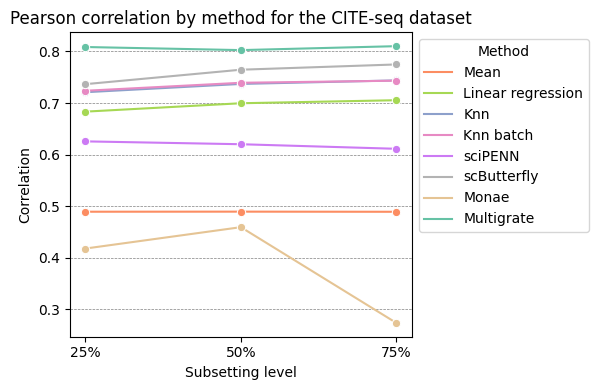

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data

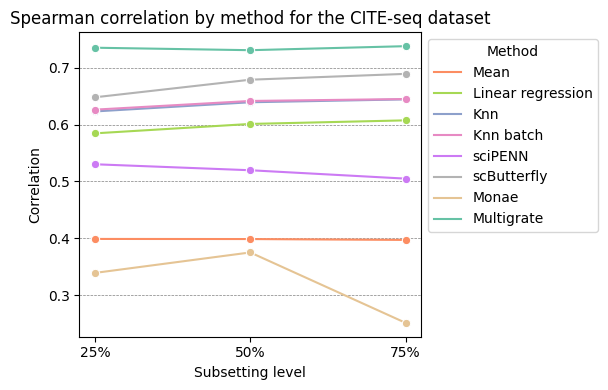

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data

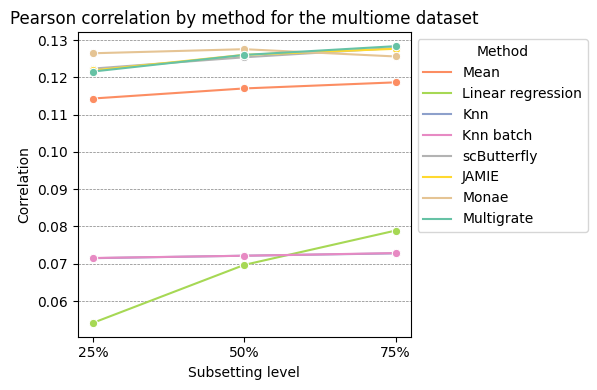

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/sc/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data

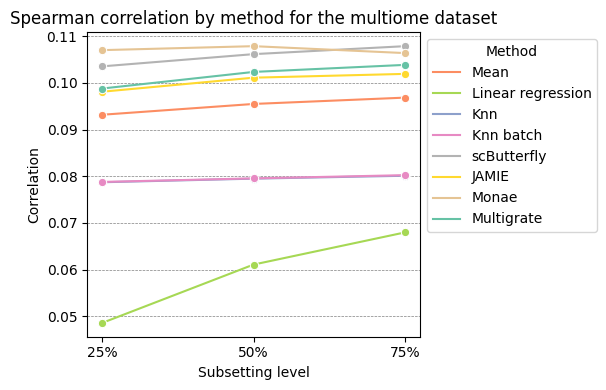

In [10]:
for modality in ['cite', 'multiome']:   
    df_modality = df[df['setting'].str.contains(modality)]
    for metric in ['pearson_mean', 'spearman_mean']:
        plt.figure(figsize=(6, 4))
        sns.lineplot(x='setting', y=metric, data=df_modality, hue='method', legend=True, palette=palette, marker='o')
        if modality == 'cite':
            modality_title = 'CITE-seq'
        else:
            modality_title = 'multiome'
        plt.title(f'{metric.title().replace("_Mean", " correlation")} by method for the {modality_title} dataset')
        plt.xlabel('Subsetting level')
        plt.ylabel('Correlation')
        plt.xticks(ticks=[f'{modality}_25', f'{modality}_50', f'{modality}_75'],
                   labels=['25%', '50%', '75%'])
        plt.legend(title='Method', loc='upper left', bbox_to_anchor=(1, 1))
        plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray', zorder=0)
        plt.tight_layout()
        plt.savefig(f'figures/correlation_{modality}_{metric}.svg', dpi=300)
        plt.show()